In [103]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l


In [104]:
#生成一个200个维度，20个样本的小训练数据集，再生成一个200个样本的大的测试数据集
n_train = 20
n_test = 100
num_inputs = 200
batch_size =10
true_w = torch.ones( size=( num_inputs ,1 )  )*0.01
true_b = 0.05
train_data = d2l.synthetic_data(true_w , true_b , n_train ) # features:20*200
train_iter =  d2l.load_array( train_data , batch_size )
test_data = d2l.synthetic_data( true_w , true_b , n_test )
test_iter = d2l.load_array( test_data , batch_size )

In [105]:
def init_params():
    w= torch.normal( 0,1 , size=( num_inputs , 1 ) ,requires_grad=True)
    b = torch.zeros( 1 , requires_grad=True )
    return [ w, b]
    #维度为200*1

In [106]:
def l2_plenty(w ):
    
    #l2范数
    return torch.sum( w.pow(2))/2

In [109]:
def train(lambd):
    w,b = init_params()
    #定义网络和目标函数
    net,loss = lambda X : d2l.linreg( X , w , b ) ,d2l.squared_loss
    num_epochs , lr = 200 , 0.005
    animator = d2l.Animator( xlabel='epochs' , ylabel='loss',yscale='log' , xlim=[5 ,num_epochs] , legend=['train', 'test'] )
    for epoch in range( num_epochs ):
        for X,y in train_iter:
            l = loss( net(X) , y ) + lambd*l2_plenty(w)
            l.sum().backward()
            d2l.sgd([w,b] , lr , batch_size )
        if ( epoch+1) % 5 == 0:
            animator.add( epoch+1 , ( d2l.evaluate_loss(net , train_iter , loss ),
                                      d2l.evaluate_loss( net , test_iter ,  loss ) ) )
    print( 'L2范数是',torch.norm( w ).item() )
    print( f'当前weight权值的误差是{(true_w-w.reshape( true_w.shape )).sum():f} ,bias误差是{(true_b-b).sum():f}')
    # print( f'当前test准确率为{d2l.evaluate_accuracy( net , test_iter):f}')

L2范数是 12.516777992248535
当前weight权值的误差是4.207048 ,bias误差是0.269283


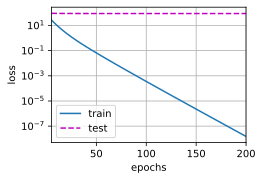

In [110]:
train(lambd=0)

In [ ]:
# next( iter(test_iter))[0]

L2范数是 0.09471223503351212
当前weight权值的误差是1.839212 ,bias误差是0.315724


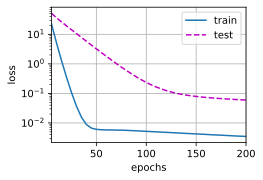

In [111]:
train(lambd=3)

L2范数是 0.025897059589624405
当前weight权值的误差是1.893920 ,bias误差是0.060303


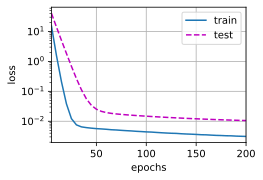

In [113]:
train( lambd=10)#发现误差越来越小